# Generate forcing fields for the relaxation of the nutrients

In [1]:
indir='../../../output/run_20230324_0000_EXP2_1rbcsno3times1_00sioh4times1_00/'

In [2]:
import cycler
import matplotlib as mpl
import matplotlib.pyplot as plt
import netcdf_tools
import numpy as np
import os
import os.path

# Depths

In [3]:
gridfile=os.path.join(indir, 'grid.t001.nc')
RC=-netcdf_tools.read_netcdf(gridfile,'RC')

In [4]:
# for idepth,depth in enumerate(RC):
#     print(idepth,depth)

# $\mathrm{ NO_3 }$ at 100 m

In [5]:
infile_no3_standard='1D_BB_NO3_GE_spring.delZ1016mm.32bits.bin'
array1d_idepth_no3_standard=np.fromfile(infile_no3_standard,dtype='>f')
x=100
xp=[RC[28],RC[29]] # Between 95.5528315 m and 101.2971055 m
assert np.all(np.diff(xp)>0), \
"xp is in decreasing order: %r %r" % (xp[0],xp[1])
fp=[array1d_idepth_no3_standard[28],array1d_idepth_no3_standard[29]]
no3_standard_100m=np.interp(x,xp,fp)

$\mathrm{ NO_3 }$ at 100 m in the standard run is
(in $\mathrm{ \mu mol\ L^{-1} }$):

In [6]:
no3_standard_100m

7.401251896036098

# $\mathrm{ Si{(OH)}_4 }$ at 100 m

In [7]:
infile_si_standard='1D_BB_Si_GE_spring.delZ1016mm.32bits.bin'
array1d_idepth_si_standard=np.fromfile(infile_si_standard,dtype='>f')
x=100
xp=[RC[28],RC[29]] # Between 95.5528315 m and 101.2971055 m
assert np.all(np.diff(xp)>0), \
"xp is in decreasing order: %r %r" % (xp[0],xp[1])
fp=[array1d_idepth_si_standard[28],array1d_idepth_si_standard[29]]
si_standard_100m=np.interp(x,xp,fp)

$\mathrm{ Si{(OH)}_4 }$ at 100 m in the standard run is
(in $\mathrm{ \mu mol\ L^{-1} }$):

In [8]:
si_standard_100m

10.085529223890894

# Generate relaxation forcing files

Multiplying factors by which to multiply $NO_3$ at 100 m

In [9]:
no3_goals=np.arange(0,21,2)

Multiplying factors by which to multiply $\mathrm{ Si{(OH)}_4 }$ at 100 m

In [10]:
si_goals=np.arange(0,21,2)

In [11]:
no3_prefix='1D_BB_NO3_GE_spring.delZ1016mm.32bits.'
ext='.bin'
for no3_goal in no3_goals:
    no3_f=no3_goal/no3_standard_100m
    array1d_idepth_no3=array1d_idepth_no3_standard*no3_f
    outfile=no3_prefix+'{0:02}'.format(no3_goal)+ext
    array1d_idepth_no3.astype('>f4').tofile(outfile)

In [12]:
si_prefix='1D_BB_Si_GE_spring.delZ1016mm.32bits.'
ext='.bin'
for si_goal in si_goals:
    si_f=si_goal/si_standard_100m
    array1d_idepth_si=array1d_idepth_si_standard*si_f
    outfile=si_prefix+'{0:02}'.format(si_goal)+ext
    array1d_idepth_si.astype('>f4').tofile(outfile)

# Verification

## Verification: $\mathrm{ NO_3 }$

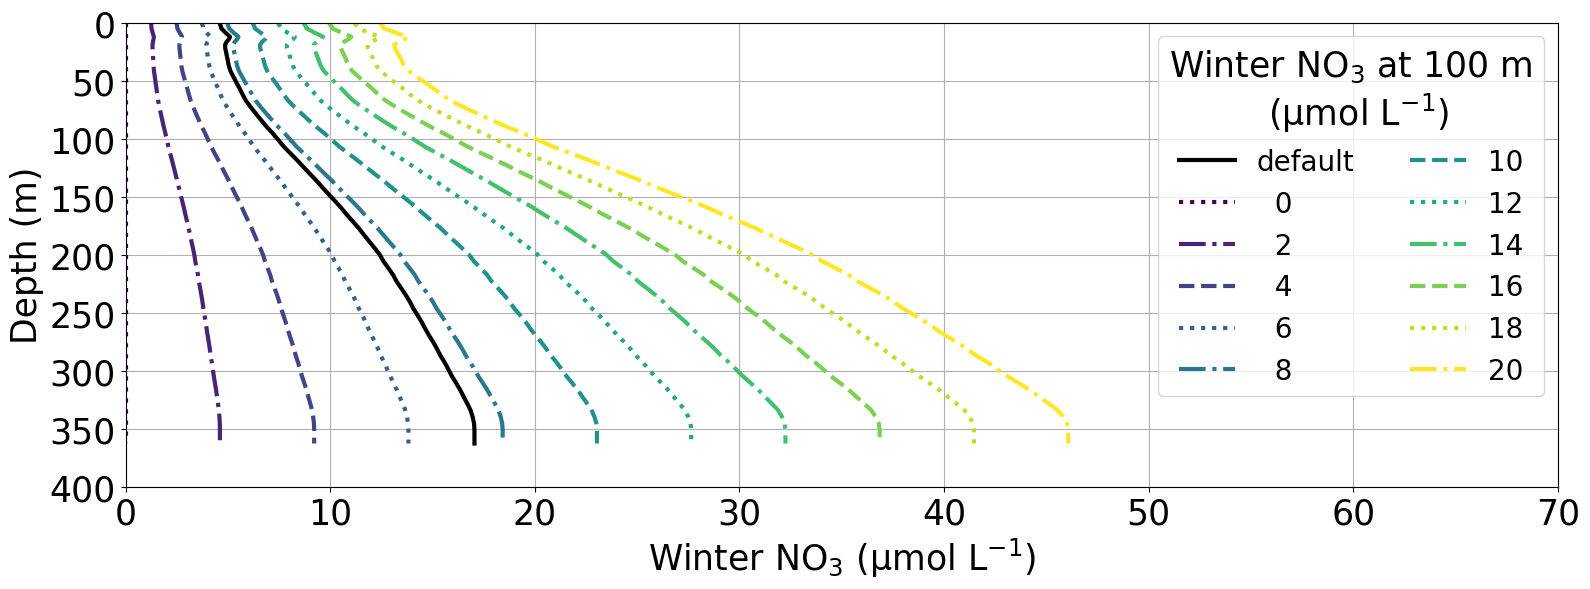

In [13]:
def make_plots(ax):
    
    # --- DEFAULT
    array1d_idepth_no3_standard=np.fromfile(infile_no3_standard,
                                            dtype='>f')
    ax.plot(array1d_idepth_no3_standard,RC,
            color='black',ls='-',label='default')
    ax.set_xlabel('Winter $\mathrm{ NO_3\ (\mu mol\ L^{-1}) }$')
    ax.set_ylabel('Depth (m)')
    ax.set_xlim(0,70)
    ax.set_ylim(0,400)
    ax.invert_yaxis()
    ax.grid(True)
    plt.tight_layout()
    
    # --- SENSITIVITY SIMULATIONS
    cc=cycler.cycler(color=plt.cm.viridis(
        np.linspace(0,1,no3_goals.size)),
                     linestyle=[':','-.','--',':','-.','--',
                                ':','-.','--',':','-.'])
    ax.set_prop_cycle(cc)
    for no3_goal in no3_goals:
        label='{0:02}'.format(no3_goal)
        infile_no3=no3_prefix+label+ext
        array1d_idepth_no3=np.fromfile(infile_no3,dtype='>f')
        label_nice=label
        if label.startswith('0'):
            label=label[1:]
            label_nice='  '+label
        ax.plot(array1d_idepth_no3,RC,label=label_nice)
    ax.legend(title='$\mathrm{ Winter\ NO_3 }$ at 100 m\n         ($\mathrm{ \mu mol\ L^{-1} }$)',
              ncol=2)
    
with plt.style.context('data_rbcs.mplstyle'):
    fig=plt.figure(figsize=(16,6))
    ax=fig.add_subplot(111)
    make_plots(ax)

    # --- SAVE
    plt.savefig('exp2.3.no3.png')

## Verification: $\mathrm{ Si{(OH)}_4 }$

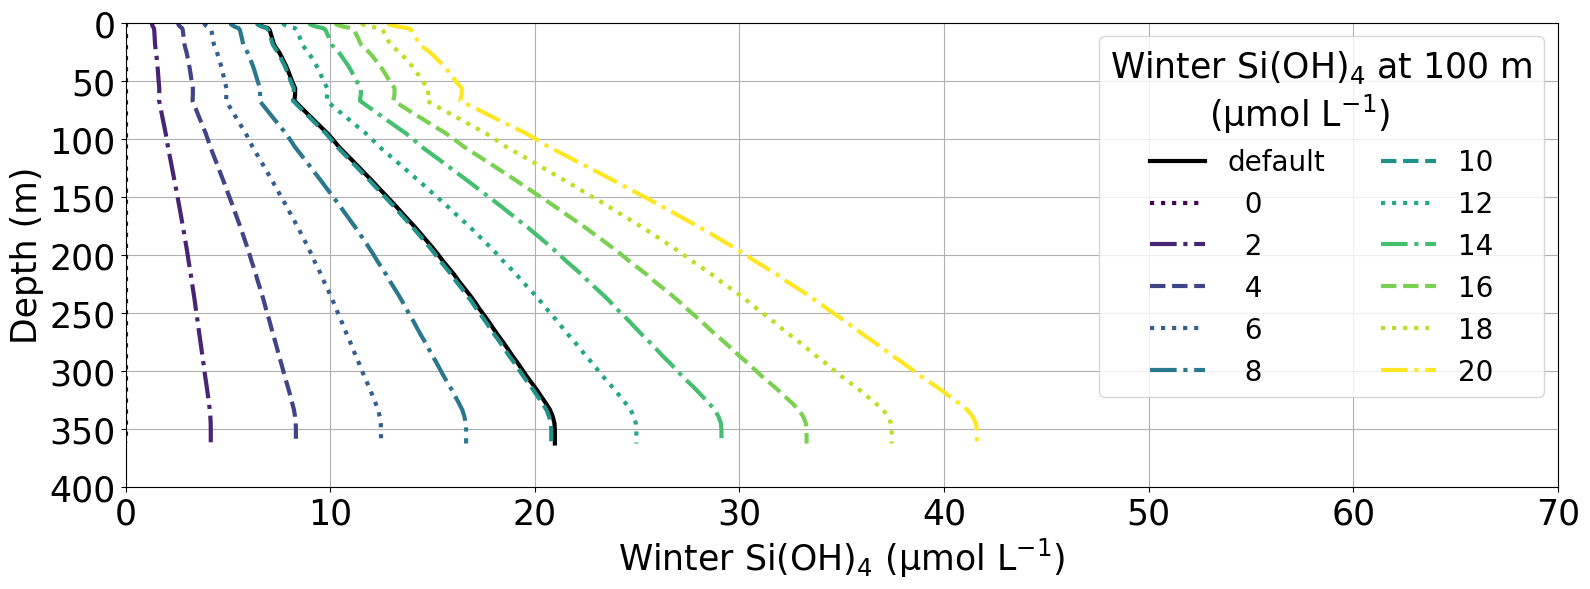

In [14]:
def make_plots(ax):
    
    # --- DEFAULT
    array1d_idepth_si_standard=np.fromfile(infile_si_standard,
                                            dtype='>f')
    ax.plot(array1d_idepth_si_standard,RC,
            color='black',ls='-',label='default')
    ax.set_xlabel('Winter $\mathrm{ Si(OH)_4\ (\mu mol\ L^{-1}) }$')
    ax.set_ylabel('Depth (m)')
    ax.set_xlim(0,70)
    ax.set_ylim(0,400)
    ax.invert_yaxis()
    ax.grid(True)
    plt.tight_layout()
    
    # --- SENSITIVITY SIMULATIONS
    cc=cycler.cycler(color=plt.cm.viridis(
        np.linspace(0,1,no3_goals.size)),
                     linestyle=[':','-.','--',':','-.','--',
                                ':','-.','--',':','-.'])
    ax.set_prop_cycle(cc)
    for si_goal in si_goals:
        label='{0:02}'.format(si_goal)
        infile_si=si_prefix+label+ext
        array1d_idepth_si=np.fromfile(infile_si,dtype='>f')
        label_nice=label
        if label.startswith('0'):
            label=label[1:]
            label_nice='  '+label
        ax.plot(array1d_idepth_si,RC,label=label_nice)
    ax.legend(title='$\mathrm{ Winter\ Si(OH)_4 }$ at 100 m\n         ($\mathrm{ \mu mol\ L^{-1} }$)',
              ncol=2)
    
with plt.style.context('data_rbcs.mplstyle'):
    fig=plt.figure(figsize=(16,6))
    ax=fig.add_subplot(111)
    make_plots(ax)

    # --- SAVE
    plt.savefig('exp2.3.si.png')

# Generate rbcs files

In [15]:
text01='''# RBCS package parameters:
 &RBCS_PARM01
  relaxMaskFile(3)='input/rbcs_mask.32bits.bin',
 &

# RBCS for pTracers (read this namelist only when ptracers pkg is compiled)
 &RBCS_PARM02
  useRBCptrnum(4)    = .TRUE.,
  useRBCptrnum(5)    = .TRUE.,
  useRBCptrnum(6)    = .TRUE.,
  tauRelaxPTR(4)     = 2592000.,
  tauRelaxPTR(5)     = 2592000.,
  tauRelaxPTR(6)     = 2592000.,
  relaxPtracerFile(4)='input/1D_BB_NO3_GE_spring.delZ1016mm.32bits.'''
text02='''.bin',
  relaxPtracerFile(5)='input/1D_BB_PO4_GE_spring.delZ1016mm.32bits.bin',
  relaxPtracerFile(6)='input/1D_BB_Si_GE_spring.delZ1016mm.32bits.'''
text03='''.bin',
 &'''

In [16]:
for no3_goal in no3_goals:
    no3_label='{0:02}'.format(no3_goal)
    for si_goal in si_goals:
        si_label='{0:02}'.format(si_goal)
        text=text01+no3_label+text02+si_label+text03
        outfile='../data.rbcs.no3.'+no3_label+'.si.'+si_label
        h=open(outfile,'w')
        h.write(text)
        h.close()

In [17]:
text='''# RBCS package parameters:
 &RBCS_PARM01
  relaxMaskFile(3)='input/rbcs_mask.32bits.bin',
 &

# RBCS for pTracers (read this namelist only when ptracers pkg is compiled)
 &RBCS_PARM02
  useRBCptrnum(4)    = .TRUE.,
  useRBCptrnum(5)    = .TRUE.,
  useRBCptrnum(6)    = .TRUE.,
  tauRelaxPTR(4)     = 2592000.,
  tauRelaxPTR(5)     = 2592000.,
  tauRelaxPTR(6)     = 2592000.,
  relaxPtracerFile(4)='input/1D_BB_NO3_GE_spring.delZ1016mm.32bits.bin',
  relaxPtracerFile(5)='input/1D_BB_PO4_GE_spring.delZ1016mm.32bits.bin',
  relaxPtracerFile(6)='input/1D_BB_Si_GE_spring.delZ1016mm.32bits.bin',
 &'''

In [18]:
outfile='../data.rbcs.no3.standard.si.standard'
h=open(outfile,'w')
h.write(text)
h.close()